# Aula 1 - Modelo de Regressão

## 1.1 Apresentação

## 1.2 Carregando os dados

[JSON Viewer](http://jsonviewer.stack.hu)

[Pandas: read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html?highlight=read_json#pandas.read_json)


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns 

In [2]:
dados = pd.read_json(path_or_buf='data/imoveis.json', orient='columns')
dados

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


### Explorar as informações

In [3]:
dados.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [4]:
dados.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

## 1.3 Tratamento de dados inicial

### Normalização

In [5]:
dados_lista1 = pd.json_normalize(dados.ident)
dados_lista1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [6]:
dados_lista2 = pd.json_normalize(dados.listing, sep='_')
dados_lista2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


### Junção dos dataframes

In [7]:
dados_imoveis = pd.concat([dados_lista1, dados_lista2], axis=1)
dados_imoveis

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73610,134148-MJIBCMDQ,Website,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,...,2350,5,10,1,4,1024,1024,0,0,0
73611,541465-QBQVXXXZ,Website,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,...,3000,5,7,5,6,750,1250,0,0,0
73612,800542-BZREFTQS,Website,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,...,None,4,5,4,3,328,328,0,0,0
73613,939419-ECGUNTIH,Website,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,...,2400,5,10,5,4,1024,1024,0,0,3


In [8]:
dados_imoveis.shape

(73615, 21)

## 1.4 Limpeza

### Filtro

In [9]:
dados_imoveis = dados_imoveis[(dados_imoveis['types_usage'] == 'Residencial') & (dados_imoveis['address_city'] == 'Rio de Janeiro')]

dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


### Tipos de variáveis

In [10]:
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

Verificando a saída do `.info`

> 69588 entries, 0 to 73614

 percebemos que temos que resentar o index, para que as infos fiquem ordenadas corretamente.
 

In [11]:
dados_imoveis.reset_index(drop=True, inplace=True)

In [12]:
dados_imoveis.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


Agora está correto.

In [13]:
dados_imoveis = dados_imoveis.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64'
})

dados_imoveis.info()

df = df[df['Column 1'] == Column 1 Condition]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

## 1.5 - Tratamento de dados final

### Lidando com dados nulos

#### Dados nulos zone

In [14]:
dados_imoveis.address_zone.value_counts()

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: count, dtype: int64

In [15]:
dados_imoveis['address_zone'] = dados_imoveis['address_zone'].replace('', np.nan)

In [16]:
#verificacao
dados_imoveis.address_zone.isnull().sum()

149

In [17]:
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


In [18]:
dici = dados_imoveis[~dados_imoveis['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
print(dici)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

In [19]:
dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
dic_zonas

{'Taquara': 'Zona Oeste',
 'Santíssimo': 'Zona Oeste',
 'Pedra de Guaratiba': 'Zona Oeste',
 'Recreio dos Bandeirantes': 'Zona Oeste',
 'Guaratiba': 'Zona Oeste',
 'Jacarezinho': 'Zona Norte',
 'Santa Cruz': 'Zona Oeste',
 'Vargem Grande': 'Zona Oeste',
 'Bangu': 'Zona Oeste',
 'Tanque': 'Zona Oeste',
 'Santo Cristo': 'Zona Central',
 'Coelho Neto': 'Zona Norte',
 'Bento Ribeiro': 'Zona Norte',
 'Campo Grande': 'Zona Oeste',
 'Oswaldo Cruz': 'Zona Norte',
 'Camorim': 'Zona Oeste',
 'Sepetiba': 'Zona Oeste',
 'Vigário Geral': 'Zona Norte',
 'Campinho': 'Zona Norte',
 'Realengo': 'Zona Oeste',
 'Jacarepaguá': 'Zona Oeste',
 'Cidade de Deus': 'Zona Oeste',
 'Honório Gurgel': 'Zona Norte',
 'Centro': 'Zona Central',
 'Cosmos': 'Zona Oeste',
 'Tomás Coelho': 'Zona Norte',
 'Cascadura': 'Zona Norte',
 'Pavuna': 'Zona Norte',
 'Paciência': 'Zona Oeste',
 'Praça Seca': 'Zona Oeste',
 'Vila Valqueire': 'Zona Oeste',
 'Inhoaíba': 'Zona Oeste',
 'Vicente de Carvalho': 'Zona Norte',
 'Senador Vasc

In [20]:
for bairro, zona in dic_zonas.items():
    dados_imoveis.loc[dados_imoveis['address_neighborhood'] == bairro, 'address_zone'] = zona

In [21]:
dados_imoveis['address_zone'].isnull().sum()

0

#### Dados nulos prices

In [22]:
dados_imoveis['prices_tax_iptu'].isnull().sum()

8725

In [23]:
dados_imoveis['prices_tax_condo'].isnull().sum()

6061

In [24]:
dados_imoveis['prices_tax_iptu'].fillna(0, inplace=True)
dados_imoveis['prices_tax_condo'].fillna(0, inplace=True)

### Alterar o nome das colunas e seleção de variáveis

In [25]:
dados_imoveis.drop(['customerID', 'source', 'types_usage', 'address_city', 
                    'address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

In [26]:
dicionario_colunas = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

dados_imoveis = dados_imoveis.rename(dicionario_colunas, axis = 1)
dados_imoveis.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


In [27]:
dados_imoveis

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,Casa,Zona Oeste,10000000.0,2900.0,2350.0,5,10,1,4,1024,1024,0,0,0
69584,Casa,Zona Oeste,10000000.0,15000.0,3000.0,5,7,5,6,750,1250,0,0,0
69585,Apartamento,Zona Sul,10000000.0,0.0,0.0,4,5,4,3,328,328,0,0,0
69586,Casa,Zona Oeste,10000000.0,35000.0,2400.0,5,10,5,4,1024,1024,0,0,3


# Aula 2 - Regressão linear

## 2.1 - Correlação

*   Correlação: grau da relação entre variáveis. Pode ser positiva ou negativa essa relação. 

*   Multicolinearidade: relação perfeita ou exata entre variáveis.



**Dica de leitura:** [Estatística prática para cientistas de dados: 50 conceitos essenciais](https://www.amazon.com.br/Estat%C3%ADstica-Pr%C3%A1tica-Para-Cientistas-Dados/dp/855080603X/ref=sr_1_21?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=1JJ44C5LJXLR3&keywords=data+science&qid=1657892785&sprefix=data+science%2Caps%2C201&sr=8-21)
e [Estatística: O que é, para que serve e como funciona](https://www.amazon.com.br/Estat%C3%ADstica-para-serve-como-funciona/dp/8537815128/ref=pd_sbs_sccl_3_1/137-9319794-7502061?pd_rd_w=EQoo7&content-id=amzn1.sym.d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_p=d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_r=E896BYW6W206YVVR3SHA&pd_rd_wg=3O0Cg&pd_rd_r=3e3910b0-5f34-4a57-87b2-1d918494d614&pd_rd_i=8537815128&psc=1) [(Naked Statistics: Stripping the Dread from the Data - versão em inglês)](https://www.amazon.com.br/Naked-Statistics-Stripping-Dread-Data/dp/039334777X/ref=sr_1_2?keywords=naked+statistics&qid=1657893464&sprefix=naked+st%2Caps%2C267&sr=8-2&ufe=app_do%3Aamzn1.fos.6a09f7ec-d911-4889-ad70-de8dd83c8a74)

In [28]:
# Seleciona apenas as colunas numéricas do DataFrame
dados_imoveis_numericos = dados_imoveis.select_dtypes(include=[np.number])

# Calcula a correlação apenas das colunas numéricas
correlacao = dados_imoveis_numericos.corr()
correlacao


,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [29]:
import matplotlib.pyplot as plt

Para mais detalhes consultar [Documentação Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

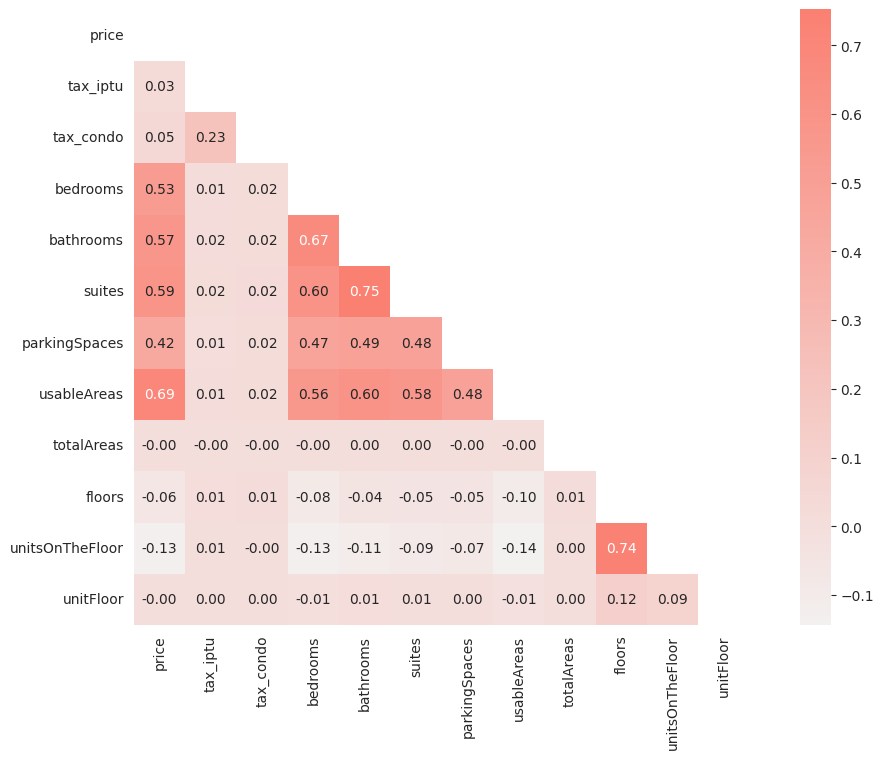

In [30]:
cores = sns.color_palette('light:salmon',as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlacao, cmap=cores,mask=mask, square=True,fmt='.2f', annot=True)

Análise da distribuição da variável resposta.

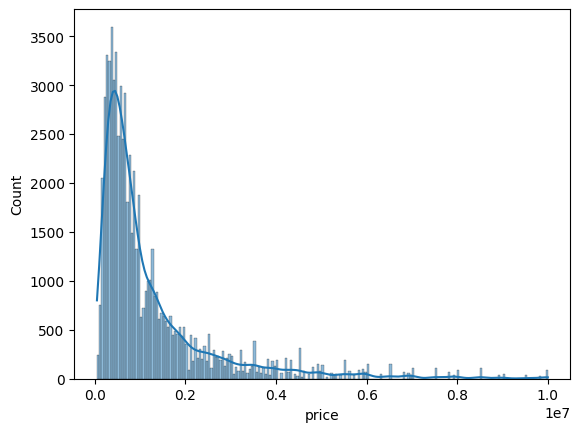

In [31]:
ax = sns.histplot(data=dados_imoveis, x='price', kde=True)

### Transformação das variáveis 

Estamos realizando uma transformação logarítmica das variáveis para obtermos uma distribuição simétrica (mais próxima da normal), para que possamos usar o modelo de regressão linear. A transformação realizada é:


$$log1p = log(1+x)$$


Lembrar de realizar a transformação inversa para obter o valor original:


$$expm1 = exp(x) - 1$$ 




* Para mais detalhes consultar as documentações [`log1p`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html), [`expm1`](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html#numpy.expm1) e [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer)



In [32]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados_imoveis.select_dtypes(exclude=['object']))

/home/eduardo_melo/repositories/ML_Engineering/sklearn/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [33]:
colunas_dados_tranformados = dados_imoveis.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([dados_imoveis.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_dados_tranformados)], axis=1)
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


In [34]:
dados_imoveis_numericos = df_transformado.select_dtypes(include=[np.number])

# Calcula a correlação apenas das colunas numéricas
correlacao = dados_imoveis_numericos.corr()
correlacao

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.427923,0.259140,0.568003,0.596144,0.610064,0.505493,0.735163,0.314154,-0.073752,-0.137149,-0.065611
tax_iptu,0.427923,1.000000,0.594730,0.249157,0.275894,0.227018,0.205281,0.320823,0.102505,0.053334,0.021432,0.069812
tax_condo,0.259140,0.594730,1.000000,0.099961,0.130743,0.089800,0.064607,0.084184,0.045599,0.097514,0.076500,0.107721
bedrooms,0.568003,0.249157,0.099961,1.000000,0.680212,0.573632,0.584000,0.656254,0.268431,-0.071413,-0.108346,-0.058431
bathrooms,0.596144,0.275894,0.130743,0.680212,1.000000,0.710539,0.581140,0.630378,0.267491,-0.035684,-0.083635,-0.011946
suites,0.610064,0.227018,0.089800,0.573632,0.710539,1.000000,0.596093,0.596842,0.255809,-0.051162,-0.085888,-0.040264
parkingSpaces,0.505493,0.205281,0.064607,0.584000,0.581140,0.596093,1.000000,0.596957,0.250257,-0.060047,-0.083196,-0.042423
usableAreas,0.735163,0.320823,0.084184,0.656254,0.630378,0.596842,0.596957,1.000000,0.387731,-0.117390,-0.170111,-0.096714
totalAreas,0.314154,0.102505,0.045599,0.268431,0.267491,0.255809,0.250257,0.387731,1.000000,-0.128810,-0.138575,-0.122174
floors,-0.073752,0.053334,0.097514,-0.071413,-0.035684,-0.051162,-0.060047,-0.117390,-0.128810,1.000000,0.876390,0.606066


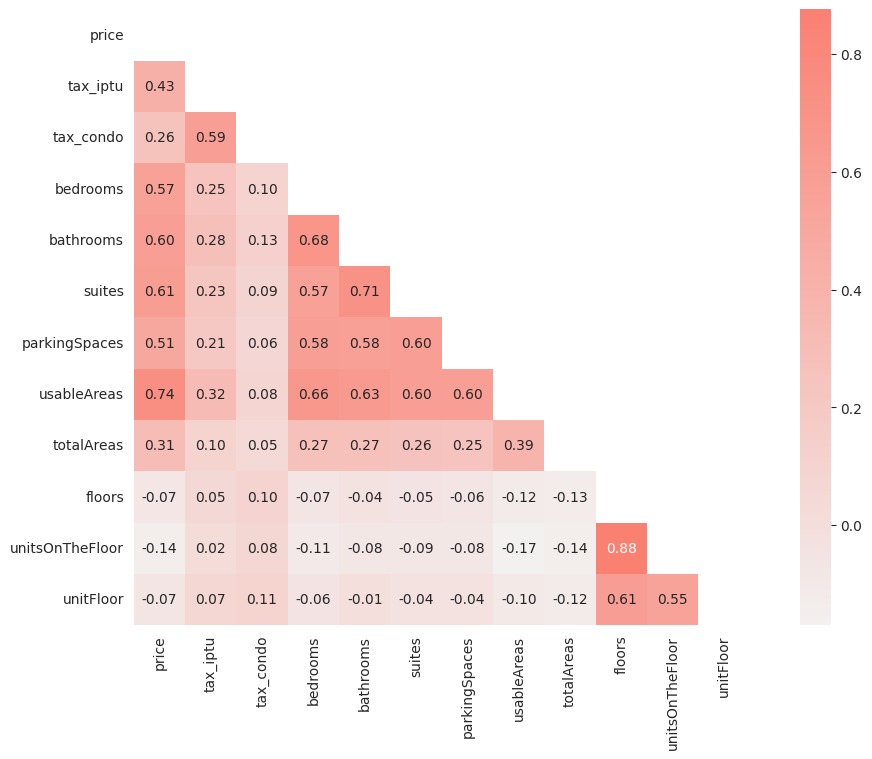

In [35]:
cores = sns.color_palette('light:salmon',as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlacao, cmap=cores,mask=mask, square=True,fmt='.2f', annot=True)

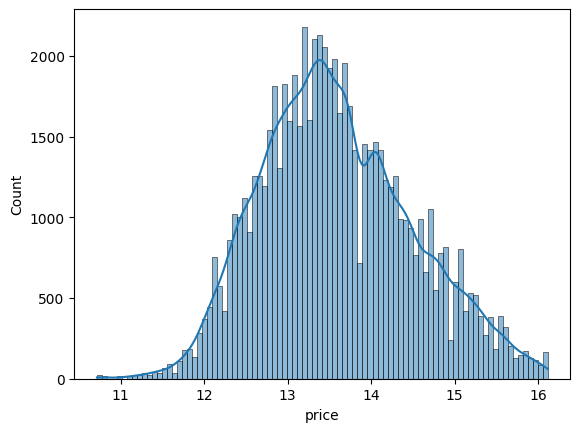

In [36]:
ax = sns.histplot(data=df_transformado, x='price', kde=True)

### Dummies

In [37]:
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns

In [38]:
variaveis_categoricas

Index(['unit', 'zone'], dtype='object')

In [39]:
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,False,False,True,False,False,True,False
1,True,False,False,False,False,True,False
2,False,False,True,False,False,True,False
3,True,False,False,False,False,True,False
4,False,False,True,False,False,True,False


In [40]:
dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1)

In [41]:
dados_imoveis_dummies

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,True,False,False,False,False,True,False
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000,False,True,False,False,False,True,False
69584,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000,False,True,False,False,False,True,False
69585,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000,True,False,False,False,False,False,True
69586,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294,False,True,False,False,False,True,False


## 2.2 - Regressão Linear

* "A análise de regressão diz respeito ao estudo da dependência de uma variável, a variável dependente, em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio (da população) da primeira em termos dos valores conhecidos ou fixados (em amostragens repetidas) das segundas."

* [Documentação Sklearn - LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) 

* Regressão Simples: a variável dependente (regressando ou `y`) se relaciona a uma única variável explanatória (regressor ou `X`).

* Regressão Múltipla: a variável dependente (regressando ou `y`) se relaciona a mais de uma única variável explanatória (regressor ou `Xi`).


[slides]

## 2.3 - Ajuste e Previsão

### Divisão dos dados

In [42]:
X = dados_imoveis_dummies.drop('price', axis=1)
y = dados_imoveis_dummies['price']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo

In [45]:
modelo = LinearRegression()

In [46]:
modelo.fit(X_treino, y_treino)

LinearRegression()

In [47]:
previsao = modelo.predict(X_teste)
previsao

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [48]:
preco_real = np.expm1(previsao[0])

In [49]:
print('Preço Log')
print('R$ {0:.2f}'.format(previsao[0]))
print('\nPreço Real')
print('R$ {0:.2f}'.format(preco_real))

Preço Log
R$ 13.26

Preço Real
R$ 572448.75


## 2.4 - Métrica de desempenho

### Coeficiente de Determinação 

* descobrir quão “bem” uma linha de regressão amostral é adequada aos dados
* r2 situa-se entre 0 e 1
* "r2 mede a proporção ou percentual da variação total de Y explicada pelo modelo de regressão."





In [50]:
from sklearn import metrics

In [51]:
print('R² {0:.3f}'.format(metrics.r2_score(y_teste, previsao)))

R² 0.788


### Extra

* [Documentação Sklearn - Métricas para Regressão](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

* Observação: Estas métricas dependem da escala dos dados!!!

* MSE (Mean Squared Error ou Erro Quadrático Médio): média da diferença **elevada ao quadrado** entre o valor real e o previsto. *(penalidade sobre o erro)*

* MAE (Mean Absolute Error ou Erro Absoluto Médio): média da diferença **absoluta** (módulo) entre o valor real e o previsto.


# Aula 3 - Árvore de Decisão para Regressão






## 3.1 - Árvore de Decisão Classificação versus Regressão

[slides]

[Biblioteca Sklearn - Desicion Tree](https://scikit-learn.org/stable/modules/tree.html#regression)

**Dica de leitura**: [Capítulo 6 - Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=sr_1_2?keywords=machine+learning&qid=1658181249&sprefix=machine%2Caps%2C469&sr=8-2&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9), [Para saber mais: como funciona a árvore de decisão? - Classificação](https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107966)



## 3.2 - Implementando o Modelo


In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
modelo_tree = DecisionTreeRegressor(random_state=42, max_depth=5)

In [54]:
modelo_tree.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [55]:
previsao_tree = modelo_tree.predict(X_teste)

**Gráfico de erro de predição**: Um gráfico de erros de predição mostra os alvos reais em relação aos valores previstos. Em um modelo perfeito, esses pontos estariam alinhados em 45 grau.


Para saber mais sobre outras visualizações:
[**Documentação YellowBrick**](https://www.scikit-yb.org/en/latest/)



In [56]:
from yellowbrick.regressor import PredictionError

/home/eduardo_melo/repositories/ML_Engineering/sklearn/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, san

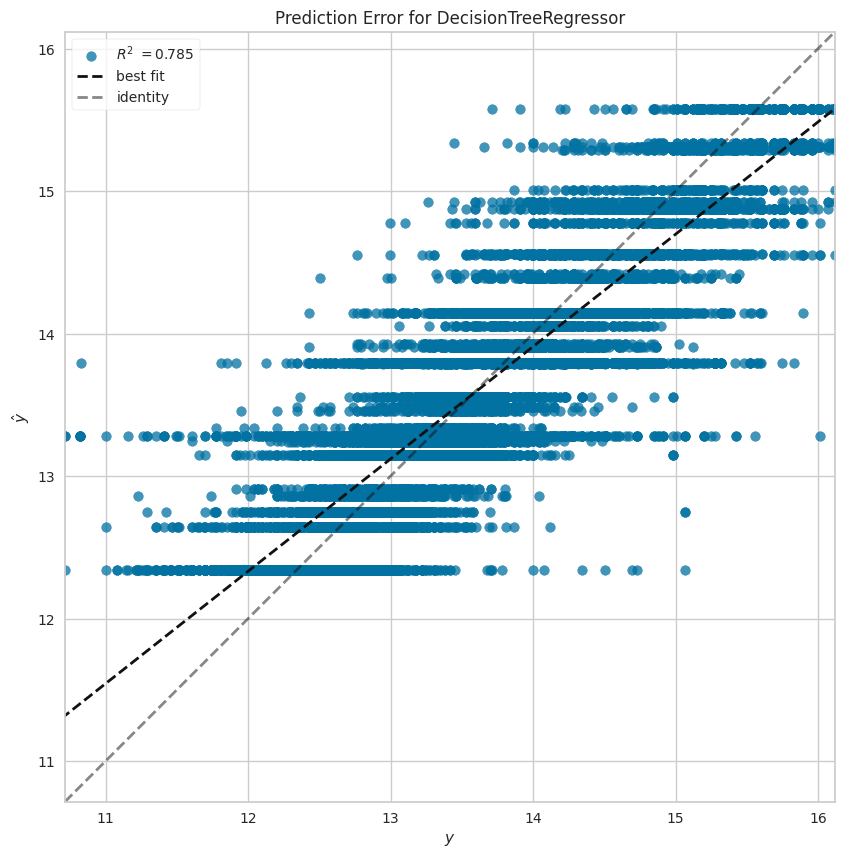

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(modelo_tree)
pev.fit(X_treino, y_treino)
pev.score(X_teste, y_teste)
pev.poof()

## 3.3 - Métrica

In [58]:
r2_tree = metrics.r2_score(y_teste, previsao_tree)

print('R² {0:.3f}'.format(r2_tree))

R² 0.785


# Aula 4 - Random Forest para Regressão


## 4.1 - Modelo Ensemble

[slides]

[Biblioteca Sklearn - Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

**Dica de leitura**: [Artigo Científico - Random Forests](https://link.springer.com/article/10.1023/A:1010933404324), [Wikipédia: Random Forests](https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,class%20selected%20by%20most%20trees.), [Capítulo 4 - Livro Introduction to Statistical and Machine Learning Methods for Data Science](https://www.amazon.com.br/dp/B09C2DVZHR/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1), [Capítulo 7 - Mãos à obra: aprendizado de máquina com Scikit-Learn, Keras & TensorFlow: Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-Scikit-Learn-inteligentes/dp/8550815489/ref=sr_1_2?keywords=machine+learning&qid=1658181249&sprefix=machine%2Caps%2C469&sr=8-2&ufe=app_do%3Aamzn1.fos.6d798eae-cadf-45de-946a-f477d47705b9) 

## 4.2 - Previsão

**Ponto de Atenção**
Os parâmetros são praticamente os mesmos entre o `DecisionTreeRegressor()` e o `RandomForestRegressor()`, com exceção de:

* `n_estimators`: quantidade de árvores na floresta
* `bootstrap`: define se será utilizado o método estatístico de amostragem *bootstrap*
* `oob_score`: define se será utilizado o método de amostragem *out-of-bag* para mensurar os erros da predição
* `n_jobs`: número de *jobs* rodando paralelamente (computação paralela - processadores)
* `warm_start`: faz a adequação de uma nova floresta ou usa uma floresta existente.
* `max_samples`: para o caso do `bootstrap` ser `True`, define o número de amostras a serem extraídas de X para treinar cada árvore base. 

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
modelo_rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [61]:
modelo_rf.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [62]:
previsao_rf = modelo_rf.predict(X_teste)

**Gráfico de erro de predição**

/home/eduardo_melo/repositories/ML_Engineering/sklearn/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, san

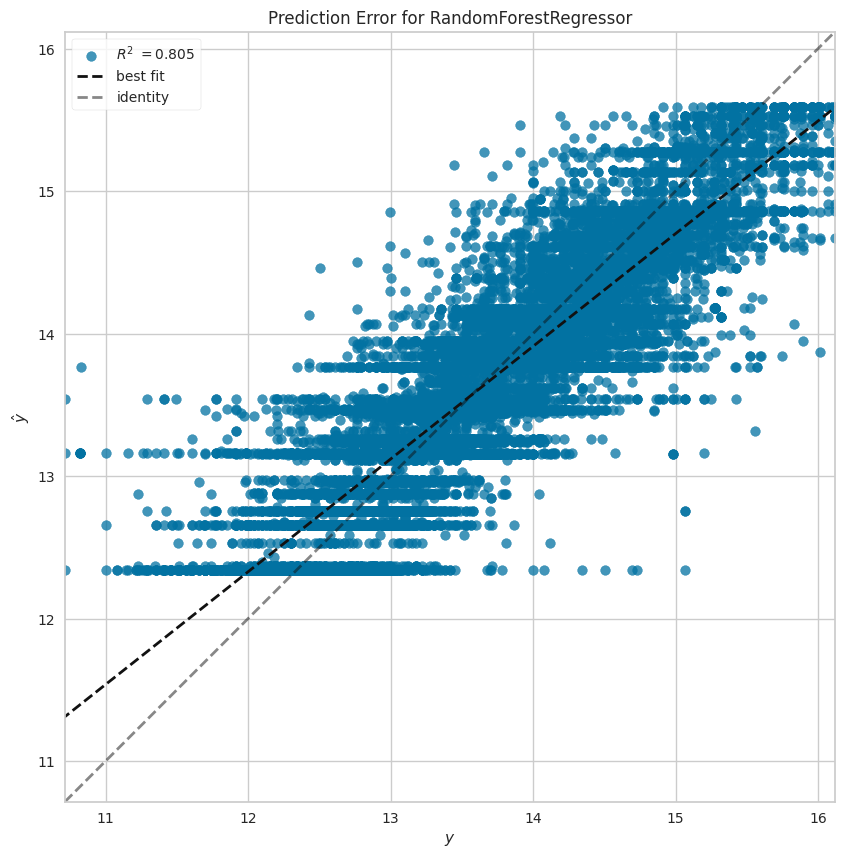

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [63]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10,10))
pev = PredictionError(modelo_rf)
pev.fit(X_treino, y_treino)
pev.score(X_teste, y_teste)
pev.poof()

# Aula 5 - Técnicas de Otimização


## 5.1 - Ferramentas de Otimização

* Por que otimizar?

* Quais ferramentas temos?

[Melhorando os hiperparâmetros - Documentação Sklearn](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)

### 1. Cross Validation (Validação Cruzada)

* [Documentação Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

* **Cross Validation** é uma técnica muito utilizada para avaliação de desempenho de modelos e consequente verificação de tendências no aprendizado de máquina. Ele consiste em particionar os dados em subconjuntos (partes), onde um subconjunto é utilizado para treino e outro subconjunto é utilizado para teste e avaliação do desempenho do modelo.

* Os dados particionados são os de treino (70% dos dados originais)!

* **K-fold**: conjunto de treino é dividido de forma aleatória em K subconjuntos de aproximadamente mesmo tamanho, depois são realizados K iterações, onde K-1 subconjuntos são para treino e 1 para validação.

* O desempenho calculado pela validação cruzada k-fold é a média de todos os valores calculados em cada iteração.


### 2. Randomized Parameter Optimization (Otimização Aleatória de Parâmetros)

* [Documentação Randomized Search](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

* [Artigo Científico sobre Random Search](https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

* "Define um espaço de busca como um domínio limitado de valores de hiperparâmetros e pontos de amostra aleatórios nesse domínio."

* Imagem no artigo sobre funcionamento desta busca



## 5.2 - Otimizando a árvore de decisão

In [64]:
from sklearn.model_selection import KFold

cv = KFold(n_splits= 5, shuffle=True)

### Cross validation


In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
desempenho_cross_r2 = cross_val_score(estimator=modelo_tree,
                                      X=X_treino,
                                      y=y_treino,
                                      scoring='r2',
                                      cv = cv)

print('Desempenho médio de r2: {}'.format(round(desempenho_cross_r2.mean(), 3)))

Desempenho médio de r2: 0.782


### Random Search Validação

In [67]:
#seleção de hiperparâmetros
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12, 14, 16],
    'max_features': ['sqrt', 'log2', 'auto'],
}

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
random_cv_dt = RandomizedSearchCV(
    modelo_tree, 
    param_random_dt, 
    n_iter=5, 
    cv=cv, 
    scoring='r2',
    n_jobs=-1
)

In [70]:
randomcv_dtr = random_cv_dt.fit(X_treino, y_treino)

/home/eduardo_melo/repositories/ML_Engineering/sklearn/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/eduardo_melo/repositories/ML_Engineering/sklearn/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/eduardo_melo/repositories/ML_Engineering/sklearn/venv/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/eduardo_melo/repositories/ML_Enginee

In [71]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,17.742156,0.787094,0.004785,0.001116,12,10,log2,10,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.808771,0.810409,0.821546,0.814103,0.812577,0.813481,0.004424,4
1,17.847754,0.868805,0.004700,0.000352,10,10,log2,14,absolute_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.825000,0.834158,0.847876,0.834040,0.836543,0.835523,0.007327,1
2,13.514959,4.394953,0.003289,0.000537,10,10,sqrt,14,absolute_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.825000,0.834158,0.847876,0.834040,0.836543,0.835523,0.007327,1
3,0.006569,0.001497,0.000000,0.000000,16,6,auto,16,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,0.055933,0.001202,0.005224,0.001048,8,10,sqrt,12,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.837108,0.831839,0.842415,0.825989,0.832790,0.834028,0.005491,3


In [72]:
randomcv_dtr.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 14,
 'criterion': 'absolute_error'}

In [73]:
randomcv_dtr.best_score_

0.8355231059881374

### Random Search Teste

In [74]:
dtr_otimizado = DecisionTreeRegressor(criterion='squared_error' , max_depth=14, max_features=None, 
                            min_samples_leaf= 10, min_samples_split =12 )

In [75]:
dtr_otimizado.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=10, min_samples_split=12)

In [76]:
predicao_otimizado_Dtr = dtr_otimizado.predict(X_teste)

In [77]:
print('R² {}'.format(metrics.r2_score(y_teste, predicao_otimizado_Dtr)))

R² 0.8655803019207737


## 5.3 - Otimizando a Random Forest

### Cross validation

In [78]:
desempenhoRF_cross_val_r2 = cross_val_score(estimator = modelo_rf,
                                       X = X_treino, 
                                       y = y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenhoRF_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.799


### Random Search Validação

Definindo os parâmetros

In [79]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

In [81]:
random_cv_rf = RandomizedSearchCV(
    modelo_rf, 
    param_random_rf, 
    n_iter=5, 
    cv=cv, 
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [82]:
rf_randomcv = random_cv_rf.fit(X_treino, y_treino)

In [83]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,41.835860,0.828985,0.510647,0.010195,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.892859,0.893006,0.898930,0.892330,0.898455,0.895116,0.002933,2
1,47.456093,6.087369,0.625439,0.098691,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.892878,0.893053,0.898949,0.892370,0.898465,0.895143,0.002923,1
2,33.307271,4.270677,0.414063,0.073015,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.892899,0.892869,0.898892,0.892273,0.898351,0.895057,0.002924,3
3,39.640195,0.395325,0.392418,0.040508,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.892568,0.892734,0.898604,0.891818,0.898074,0.894760,0.002943,4
4,30.380345,2.474666,0.243346,0.069534,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.892593,0.892589,0.898473,0.891723,0.897902,0.894656,0.002906,5


In [84]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [85]:
rf_randomcv.best_score_

0.8951427511252457

### Random Search Teste

In [86]:
rf_otimizado2 = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)

In [87]:
rf_otimizado2.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [88]:
predicao_rf_otimizado2 = rf_otimizado2.predict(X_teste)

In [89]:
random_otimized = metrics.r2_score(y_teste, predicao_rf_otimizado2)
print('Desempenho médio de r2: {}'.format(round(random_otimized.mean(), 3)))

Desempenho médio de r2: 0.895


## 5.4 - Escolhendo o melhor modelo

In [90]:
cliente_joana = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
cliente_joana

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [93]:
predicao_cliente_joana = rf_otimizado2.predict(cliente_joana)
print('R$ {0:.2f}'.format(np.expm1(predicao_cliente_joana)[0]))

R$ 284320.64
